In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")
mpl.rcParams['figure.figsize'] = (20,5)
import math
from math import sqrt

import datetime
import warnings
warnings.filterwarnings('ignore')


In [2]:
features = pd.read_csv('features.csv.zip')
train = pd.read_csv('train.csv.zip')
stores = pd.read_csv('stores.csv')
test = pd.read_csv('test.csv.zip')
sample_submission = pd.read_csv('sampleSubmission.csv.zip')

In [3]:
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [7]:
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [9]:
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [11]:
test.head()

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False


In [13]:
sample_submission.head()

,Id,Weekly_Sales
0,1_1_2012-11-02,0
1,1_1_2012-11-09,0
2,1_1_2012-11-16,0
3,1_1_2012-11-23,0
4,1_1_2012-11-30,0


### Before starting to work with the data, we can merge the files train, stores and features, in order to increase the number of input variables. ###

In [62]:
dataset = train.merge(stores, how='left',on=['Store']).merge(features, how='left',on=['Store','Date','IsHoliday'])
test_dataset = test.merge(stores, how='left').merge(features, how='left')

## Data Exploration ##
### lets look at our data after merging ###

In [64]:
dataset.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106
4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106


In [66]:
dataset.shape # Checking the number of rows and columns

(421570, 16)

### We can identify the following input variables ###

<ul>
    <li>Store</li>
    <li>Dept</li>
    <li>Date</li>
    <li>IsHoliday</li>
    <li>Type</li>
    <li>Size</li>
    <li>Temperature</li>
    <li>Fuel_Price</li>
    <li>MarkDown1</li>
    <li>MarkDown2</li>
    <li>MarkDown3</li>
    <li>MarkDown4</li>
    <li>MarkDown5</li>
    <li>CPI</li>
    <li>Unemployment</li>
</ul>

### The Target variable is Weekly_Sales ###



In [68]:
dataset.describe(include = 'all')

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,421570.000000,421570.000000,421570,421570.000000,421570,421570,421570.000000,421570.000000,421570.000000,150681.000000,111248.000000,137091.000000,134967.000000,151432.000000,421570.000000,421570.000000
unique,NaN,NaN,143,NaN,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,2011-12-23,NaN,False,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,3027,NaN,391909,215478,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,22.200546,44.260317,NaN,15981.258123,NaN,NaN,136727.915739,60.090059,3.361027,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,171.201947,7.960289
std,12.785297,30.492054,NaN,22711.183519,NaN,NaN,60980.583328,18.447931,0.458515,8291.221345,9475.357325,9623.078290,6292.384031,5962.887455,39.159276,1.863296
min,1.000000,1.000000,NaN,-4988.940000,NaN,NaN,34875.000000,-2.060000,2.472000,0.270000,-265.760000,-29.100000,0.220000,135.160000,126.064000,3.879000
25%,11.000000,18.000000,NaN,2079.650000,NaN,NaN,93638.000000,46.680000,2.933000,2240.270000,41.600000,5.080000,504.220000,1878.440000,132.022667,6.891000
50%,22.000000,37.000000,NaN,7612.030000,NaN,NaN,140167.000000,62.090000,3.452000,5347.450000,192.000000,24.600000,1481.310000,3359.450000,182.318780,7.866000
75%,33.000000,74.000000,NaN,20205.852500,NaN,NaN,202505.000000,74.280000,3.738000,9210.900000,1926.940000,103.990000,3595.040000,5563.800000,212.416993,8.572000


### There are some Null values , lets review them. ###

In [70]:
dataset.isnull().sum() # Checking the null values

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Type                 0
Size                 0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
dtype: int64

### We will drop the null values in the Data Manipulation section. ###

# Input Variables Correlation with the output feature Weekly_Sales #

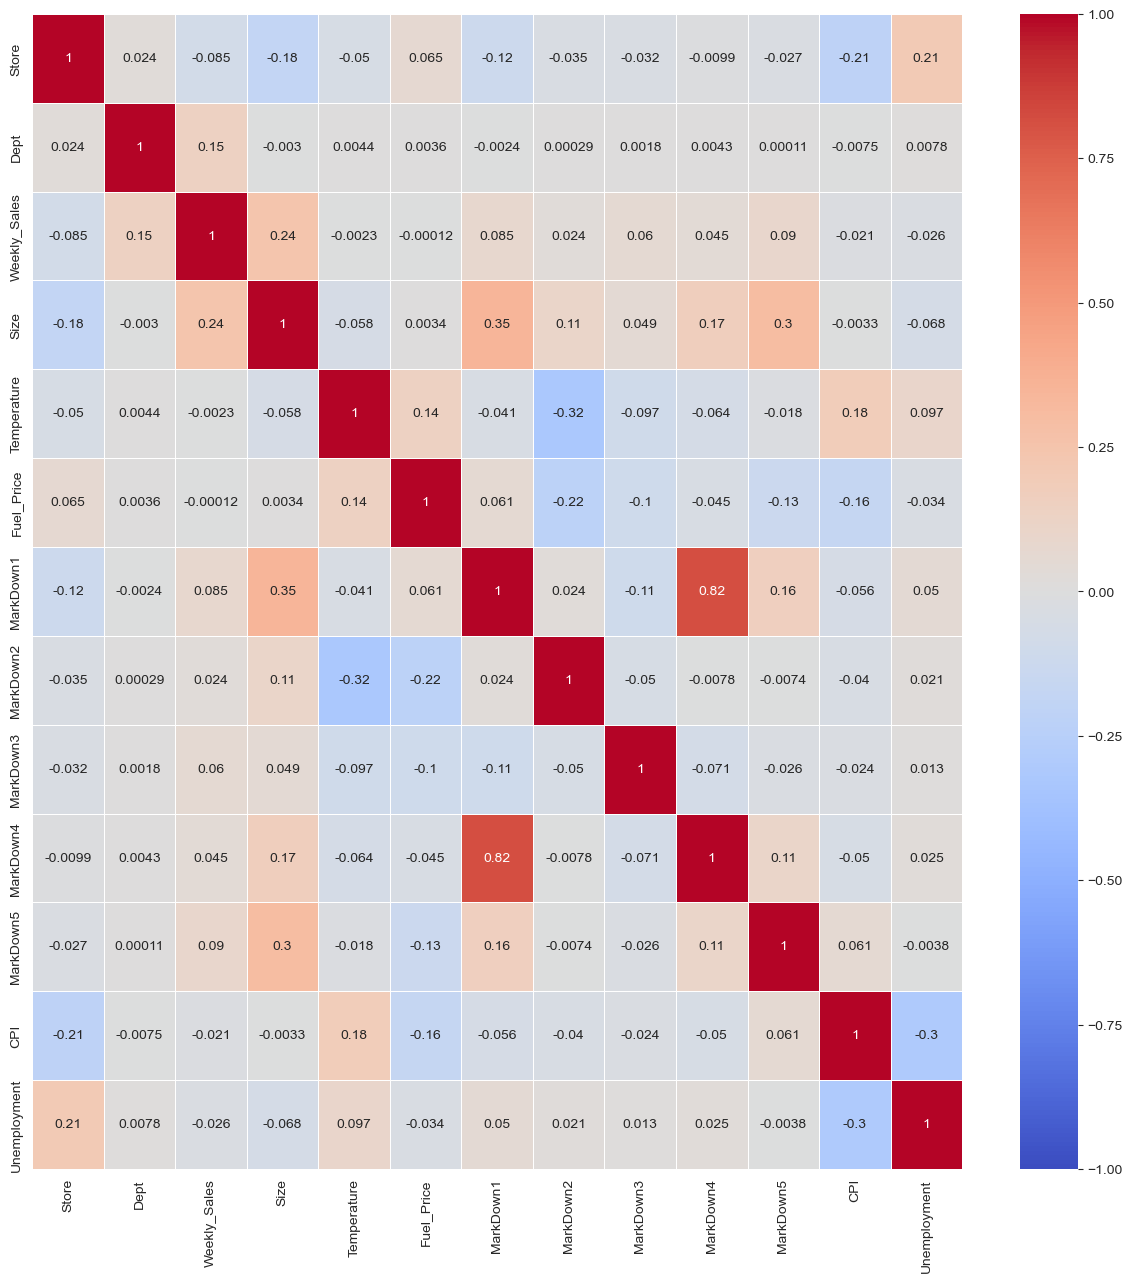

In [72]:
numeric_data = dataset.select_dtypes(include=[float, int])

corr = numeric_data.corr()
plt.figure(figsize=(15, 15))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5, vmin=-1, vmax=1)
plt.show()

### By watching the correlation matrix, we can see that Weekly_Sales have a higher correlation with Store, Dept and Size. ###

### We will drop the variables with lower correlation in the Data Manipulation Section #
# Data Manipulation #on

In [47]:
dataset[['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']] = dataset[['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']].fillna(0)

dataset['Year'] = pd.to_datetime(dataset['Date']).dt.year
dataset['Month'] = pd.to_datetime(dataset['Date']).dt.month
dataset['Week'] = pd.to_datetime(dataset['Date']).dt.isocalendar().week
dataset = dataset.drop(columns=[ "Fuel_Price", 'Temperature'])

<ul>we will do the following steps:
    <li>Remove null values from the markdown variables.</li>
    <li>Create variables for year, month and week, based on the date field.</li>
    <li>Remove the variables with low correlation ( Fuel_Price & Temperature).</li>
</ul>

### We can move the target variable to the last column of the dataframe to ease the manipulation of the data ###


In [49]:
df = dataset.pop('Weekly_Sales')
dataset['Weekly_Sales'] = df
dataset.describe()

,Store,Dept,Size,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Year,Month,Week,Weekly_Sales
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.0,421570.000000
mean,22.200546,44.260317,136727.915739,2590.074819,879.974298,468.087665,1083.132268,1662.772385,171.201947,7.960289,2010.968591,6.449510,25.826762,15981.258123
std,12.785297,30.492054,60980.583328,6052.385934,5084.538801,5528.873453,3894.529945,4207.629321,39.159276,1.863296,0.796876,3.243217,14.151887,22711.183519
min,1.000000,1.000000,34875.000000,0.000000,-265.760000,-29.100000,0.000000,0.000000,126.064000,3.879000,2010.000000,1.000000,1.0,-4988.940000
25%,11.000000,18.000000,93638.000000,0.000000,0.000000,0.000000,0.000000,0.000000,132.022667,6.891000,2010.000000,4.000000,14.0,2079.650000
50%,22.000000,37.000000,140167.000000,0.000000,0.000000,0.000000,0.000000,0.000000,182.318780,7.866000,2011.000000,6.000000,26.0,7612.030000
75%,33.000000,74.000000,202505.000000,2809.050000,2.200000,4.540000,425.290000,2168.040000,212.416993,8.572000,2012.000000,9.000000,38.0,20205.852500
max,45.000000,99.000000,219622.000000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,2012.000000,12.000000,52.0,693099.360000


In [144]:
# checking null Values
dataset.isnull().sum()

Store           0
Dept            0
Date            0
IsHoliday       0
Type            0
Size            0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
Year            0
Month           0
Week            0
Weekly_Sales    0
dtype: int64

In [204]:
# Checking for duplicate values
dataset.duplicated().sum()

0

In [51]:
dataset.groupby('Month')['Weekly_Sales'].mean()

Month
1     14126.075111
2     16008.779217
3     15416.657597
4     15650.338357
5     15776.337202
6     16326.137002
7     15861.419650
8     16062.516933
9     15095.886154
10    15243.855576
11    17491.031424
12    19355.702141
Name: Weekly_Sales, dtype: float64

In [53]:
## to see the best years for sales
dataset.groupby('Year')['Weekly_Sales'].mean()

Year
2010    16270.275737
2011    15954.070675
2012    15694.948597
Name: Weekly_Sales, dtype: float64

<Axes: xlabel='Month'>

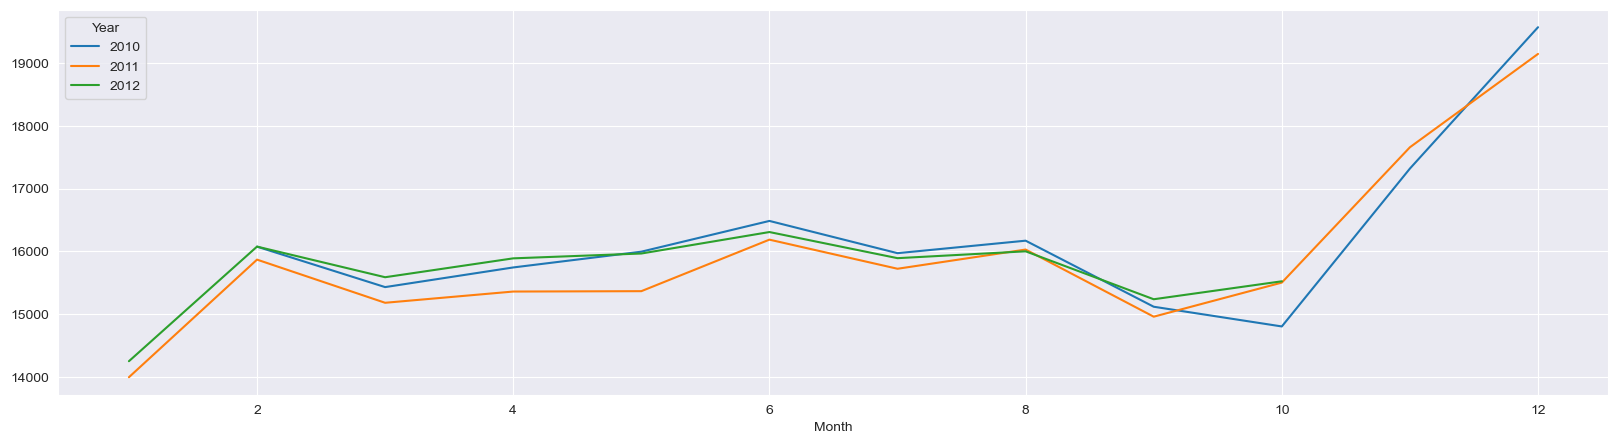

In [55]:
monthly_sales = pd.pivot_table(dataset, values='Weekly_Sales', columns='Year', index='Month')
monthly_sales.plot()


### From the graph, it is seen that 2011 has lower sales than 2010 generally. When we look at the mean sales it is seen that 2010 has higher values, but 2012 has no information about November and December which have higher sales. Despite of 2012 has no last two months sales, it's mean is near to 2010. Most probably, it will take the first place if we get 2012 results and add them. ###

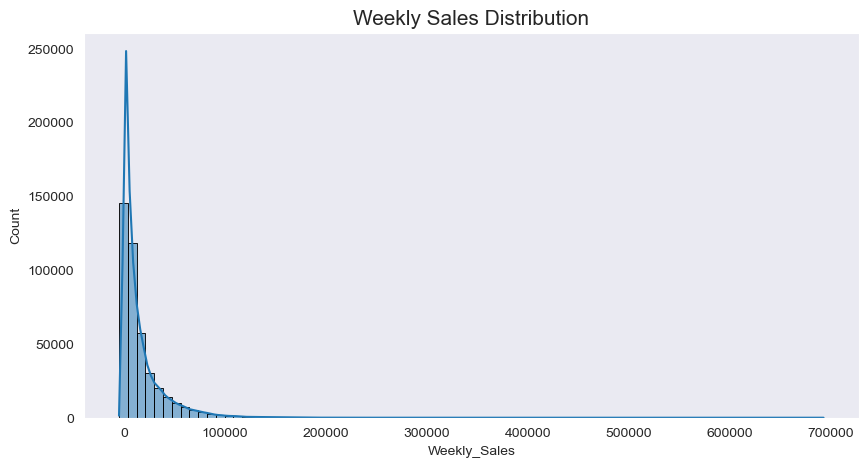

In [57]:
# data Visualization #
# Analysing the distribution of Target Variable#

plt.figure(figsize = (10, 5))
sns.histplot(dataset['Weekly_Sales'], bins=80, edgecolor="black", kde=True)
plt.title('Weekly Sales Distribution', fontsize= 15)
plt.grid()
plt.show()

In [152]:
dataset['IsHoliday'].value_counts()

IsHoliday
False    391909
True      29661
Name: count, dtype: int64

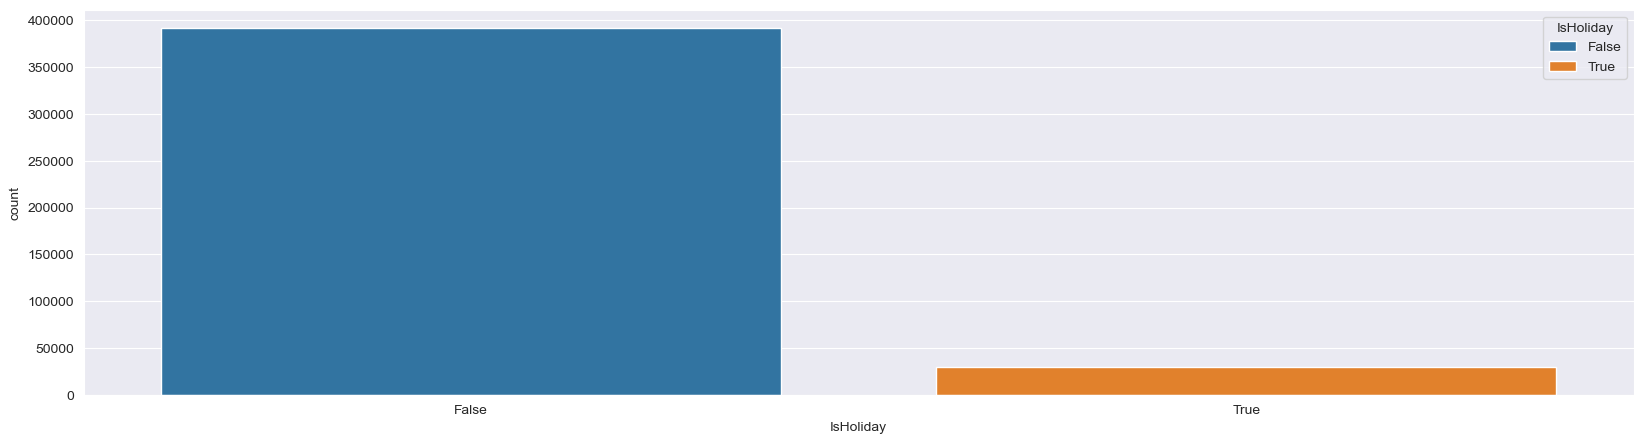

In [154]:
sns.countplot(data= dataset, x = 'IsHoliday',  hue = 'IsHoliday')
plt.show()

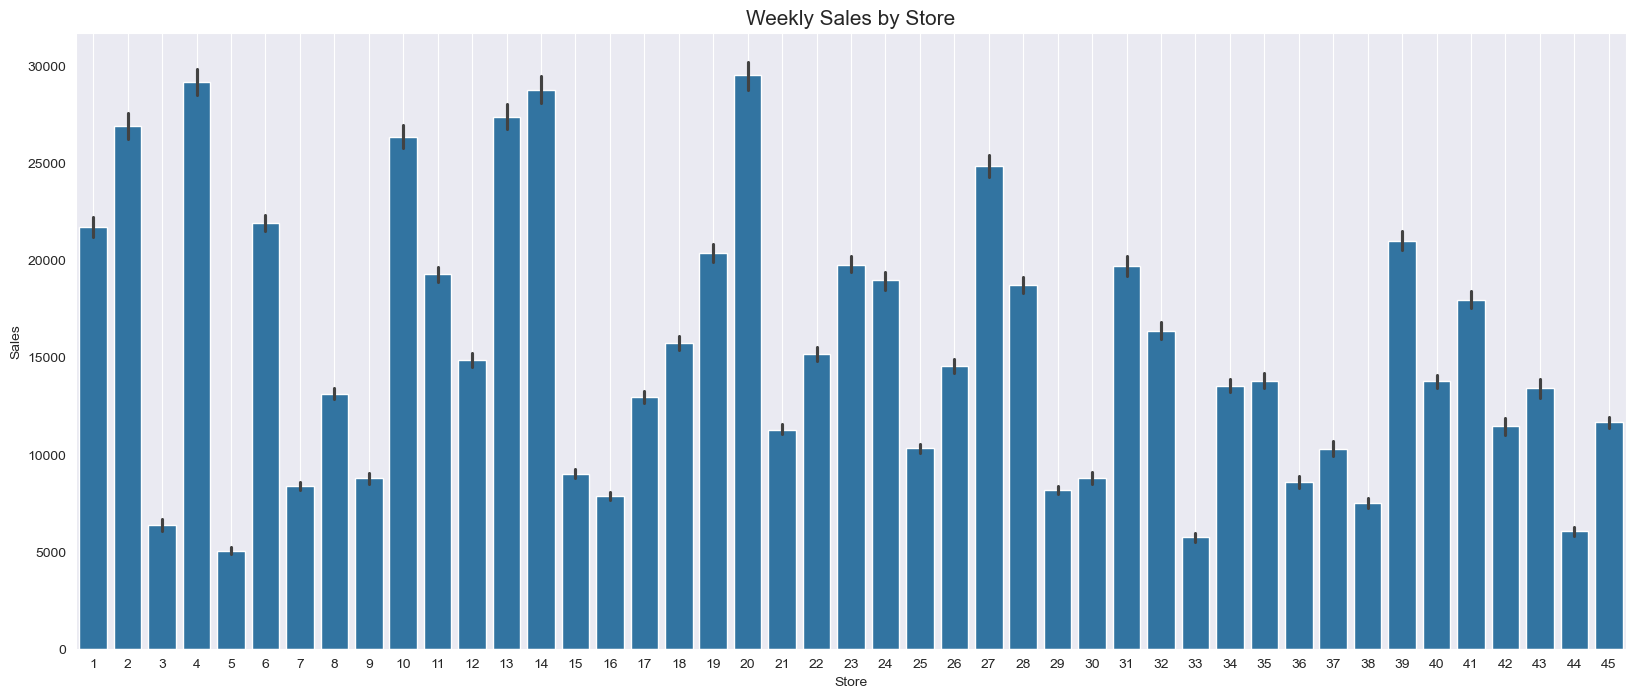

In [156]:
plt.figure(figsize =(20,8))
sns.barplot(x='Store', y='Weekly_Sales', data= dataset)
plt.title('Weekly Sales by Store', fontsize = 15)
plt.ylabel('Sales')
plt.xlabel('Store')
plt.grid()
plt.show()

           

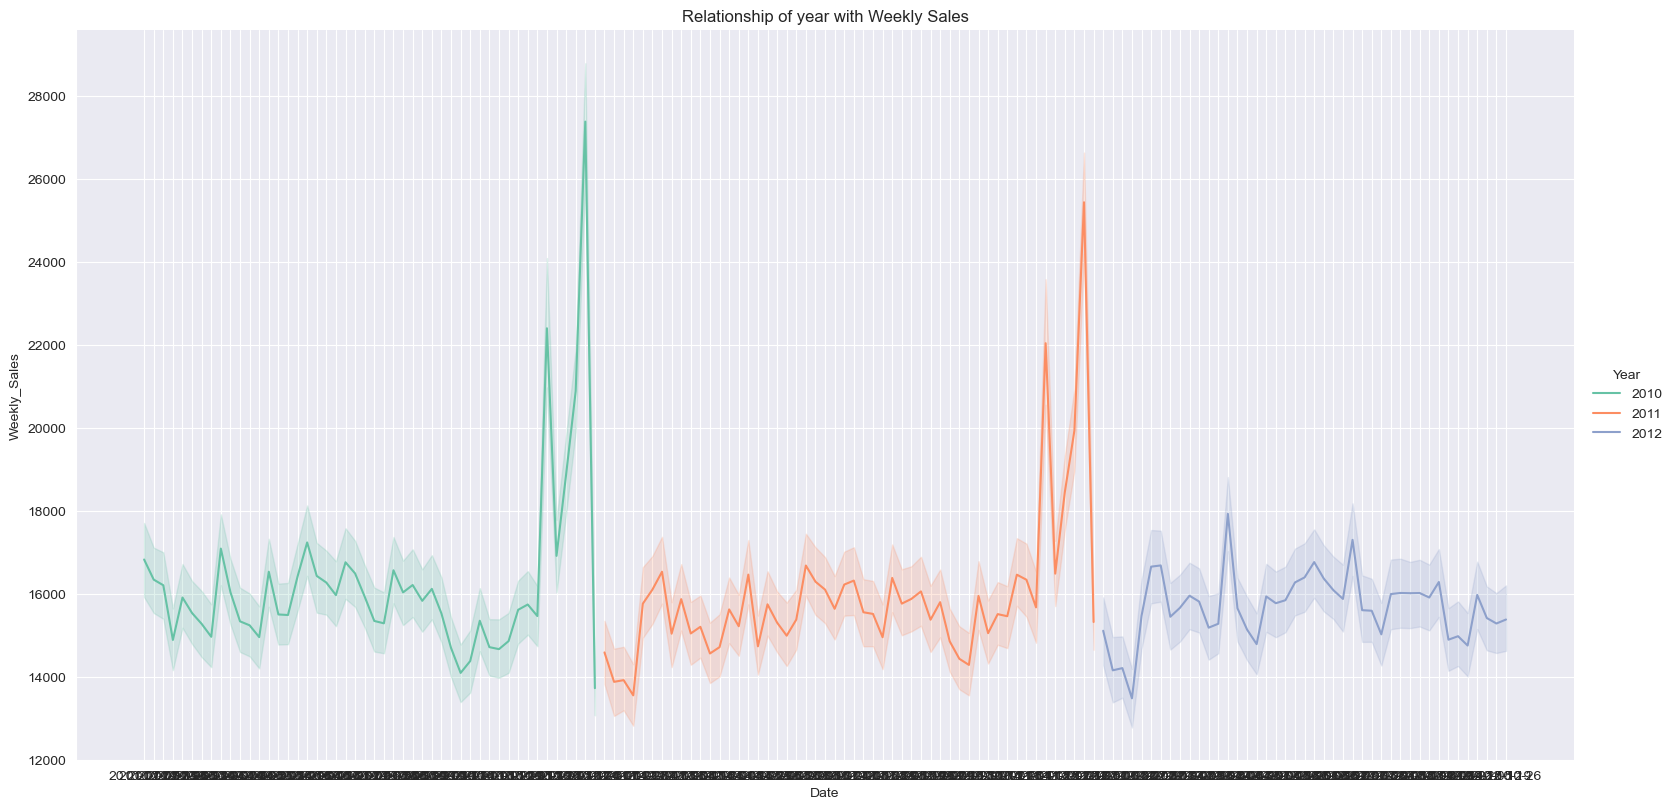

In [60]:
# This function plots the graph between categorized features and weekly_sales

def graph_relation_to_weekly_sales(col_relation, df, x='Week', palette=None):
     
    
    # Create the line plot
    sns.relplot(x=x, y='Weekly_Sales', hue=col_relation, data=df, kind='line', height=8,aspect =2 ,palette=palette)
    
    # Show the plot
    plt.title('Relationship of year with Weekly Sales')
    plt.grid(True)
    plt.show()


graph_relation_to_weekly_sales('Year', dataset, x='Date', palette='Set2')

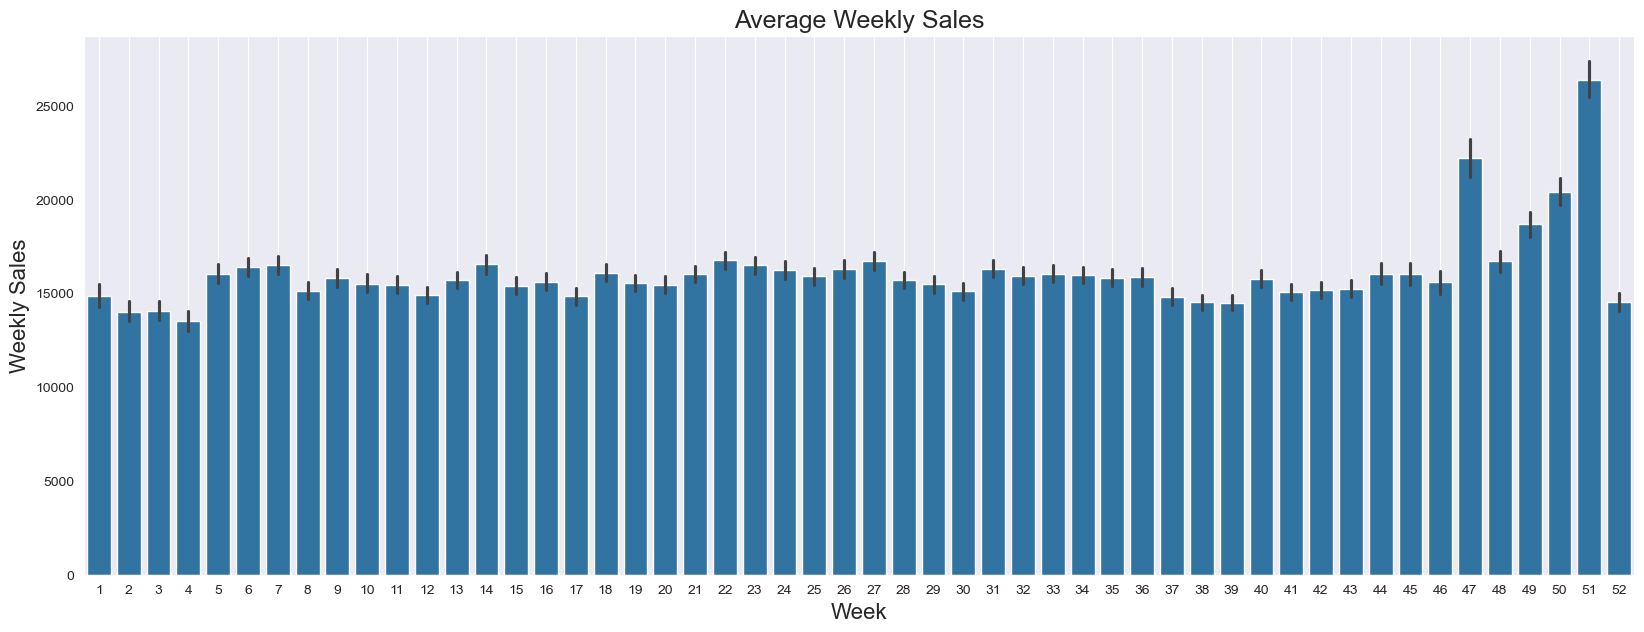

In [160]:
weekly_sales_avg = dataset.groupby('Week')['Weekly_Sales'].mean().reset_index()
plt.figure(figsize = (20, 7))
sns.barplot(x=dataset['Week'],y= dataset['Weekly_Sales'], data= weekly_sales_avg)
plt.title('Average Weekly Sales', fontsize=18)
plt.ylabel('Weekly Sales', fontsize=16)
plt.xlabel('Week', fontsize=16)
plt.grid()
plt.show()

### From graphs, it is seen that 51th week and 47th weeks have significantly higher averages as Christmas, Thankgiving and Black Friday effects. ###

In [162]:
dataset.head()

,Store,Dept,Date,IsHoliday,Type,Size,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Year,Month,Week,Weekly_Sales
0,1,1,2010-02-05,False,A,151315,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,2010,2,5,24924.50
1,1,1,2010-02-12,True,A,151315,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,2010,2,6,46039.49
2,1,1,2010-02-19,False,A,151315,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,2010,2,7,41595.55
3,1,1,2010-02-26,False,A,151315,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,2010,2,8,19403.54
4,1,1,2010-03-05,False,A,151315,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,2010,3,9,21827.90


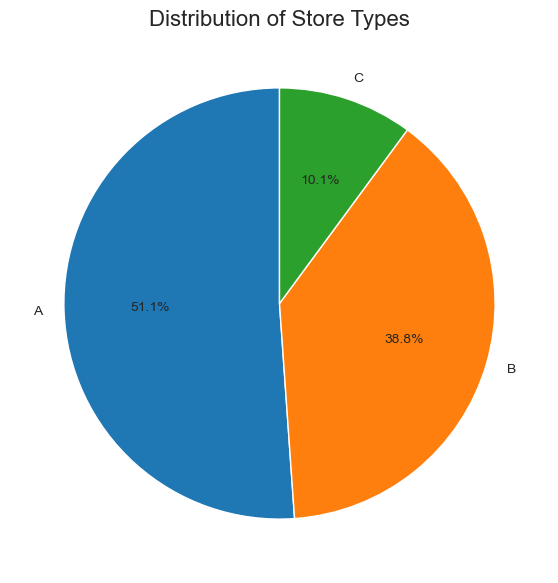

In [88]:
# Types of store
store_types = dataset['Type'].value_counts()

plt.figure(figsize=(7, 7))
plt.pie(store_types, labels=store_types.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Store Types', fontsize=16)
plt.show()

### It's evident that there are three categories of stores, with the A category being the present more than 50 % of total type. ###



In [209]:
dataset['CPI'].min() # Checking the lower band of inflation

126.064

In [211]:
dataset['CPI'].max()  # Checking the higher band of inflation

227.2328068

In [221]:
bins2=[125,155,185,215,245] # Creating bins and labels for categorization of inflation rate
labels2=['125-155','156-185','186-215','216-245',]

In [223]:
dataset2 = dataset
dataset2['CPI_cat']= pd.cut(dataset2['CPI'],bins=bins2,labels=labels2)
dataset2.head()

,Store,Dept,Date,IsHoliday,Type,Size,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Year,Month,Week,Weekly_Sales,CPI_cat
0,1,1,2010-02-05,False,A,151315,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,2010,2,5,24924.50,186-215
1,1,1,2010-02-12,True,A,151315,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,2010,2,6,46039.49,186-215
2,1,1,2010-02-19,False,A,151315,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,2010,2,7,41595.55,186-215
3,1,1,2010-02-26,False,A,151315,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,2010,2,8,19403.54,186-215
4,1,1,2010-03-05,False,A,151315,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,2010,3,9,21827.90,186-215


In [225]:
dataset2['CPI_cat'].value_counts()

CPI_cat
125-155    207891
186-215    130304
216-245     75148
156-185      8227
Name: count, dtype: int64

In [233]:
dataset2_cpi_sales = dataset2.groupby('CPI_cat')['Weekly_Sales'].sum().reset_index()
dataset2_cpi_sales

,CPI_cat,Weekly_Sales
0,125-155,3.406971e+09
1,156-185,1.751615e+08
2,186-215,2.032509e+09
3,216-245,1.122578e+09


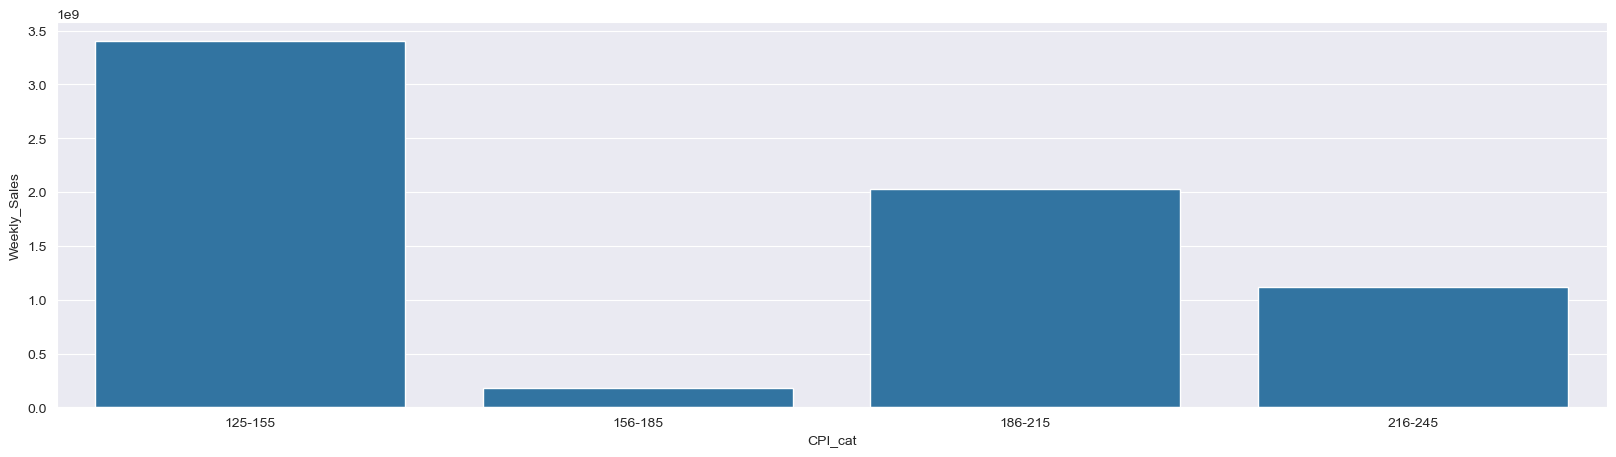

In [244]:
sns.barplot(x='CPI_cat',y='Weekly_Sales',data=dataset2_cpi_sales)
plt.show()

### Inference:
<ul>
    <li>when inflation is lower the performance of stores are high</li>
    <li>in intial time of inflation the sale were drop signficantly</li>
    <li>in third level when inflation is high the people may scared for future prices and bought more grocery for future needs also</li>
    <li>eventually when the inflation went peaks the sales are went down</li>
</ul>
down

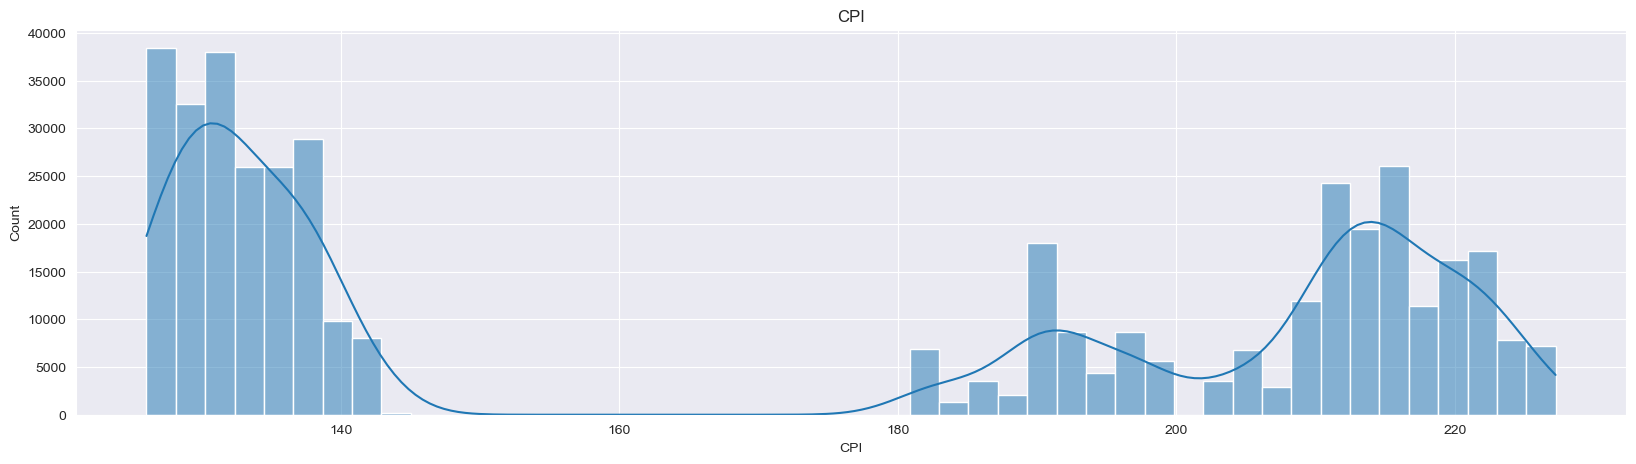

In [168]:
sns.histplot(data=dataset, x='CPI', kde= True)
plt.title('CPI')
plt.show()

# CPI value is varies from 120-220, but there is no value for 140-180

### Unemployment ###

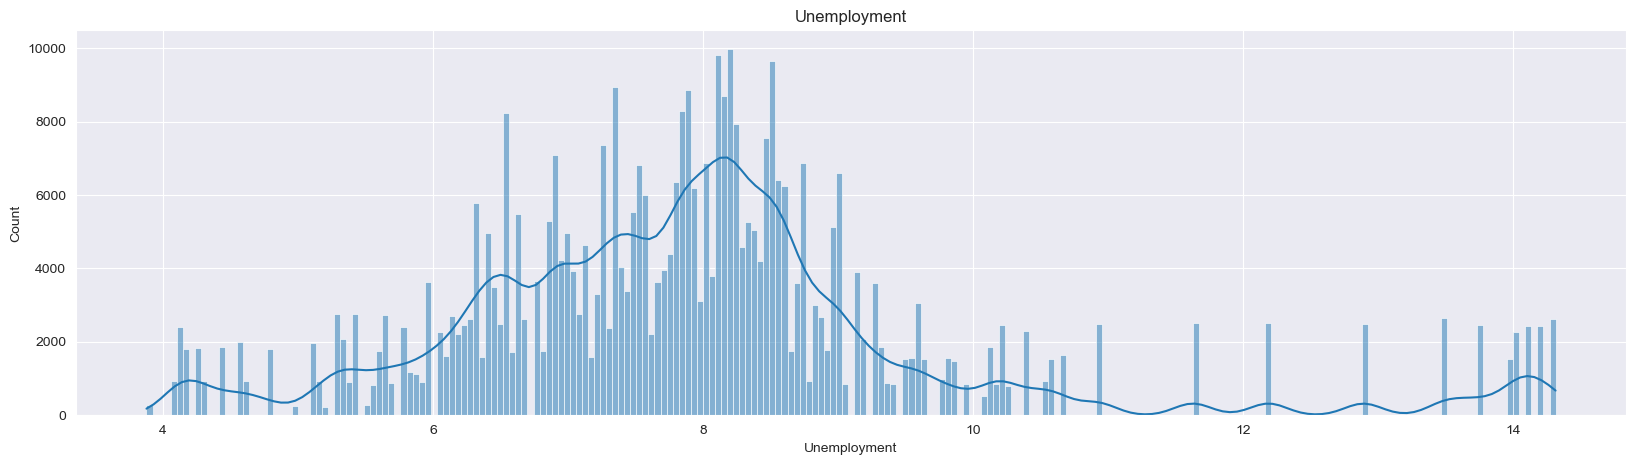

In [170]:
sns.histplot(data=dataset, x='Unemployment', kde= True)
plt.title('Unemployment')
plt.show()

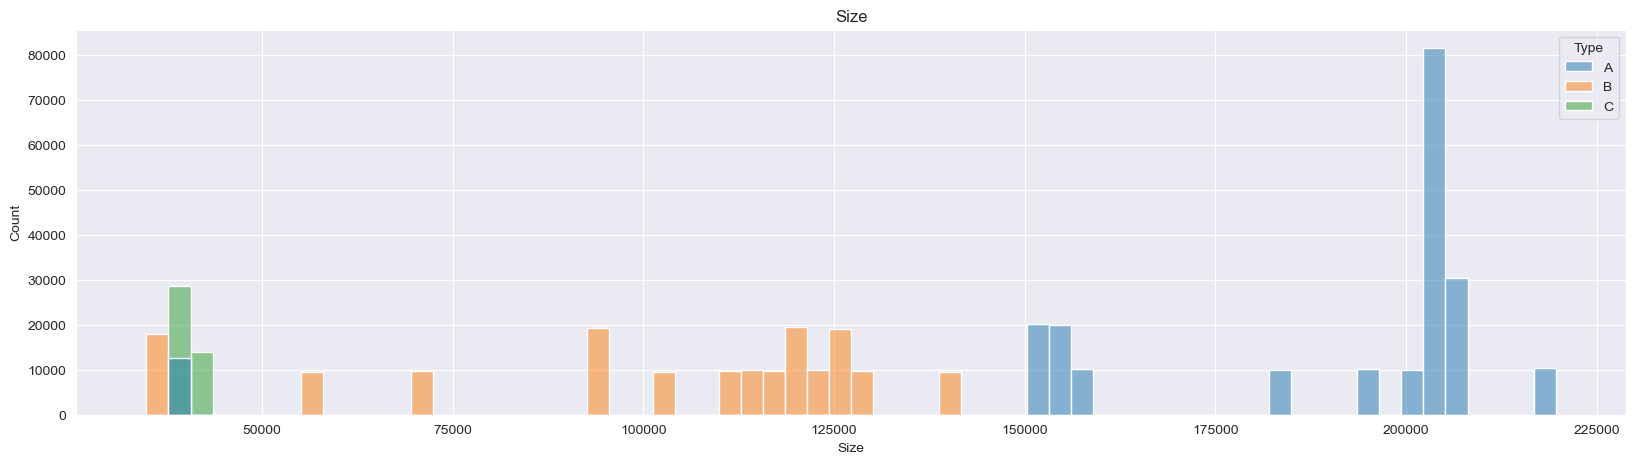

In [172]:
# Size of store
sns.histplot(data=dataset, x="Size", hue= dataset['Type'])
plt.title('Size')
plt.show()
#Insight: There are three types of stores - A, B, and C, with the A category being both the most prevalent and the largest in size

### What is the effect of the size of a store on its weekly sales? ###

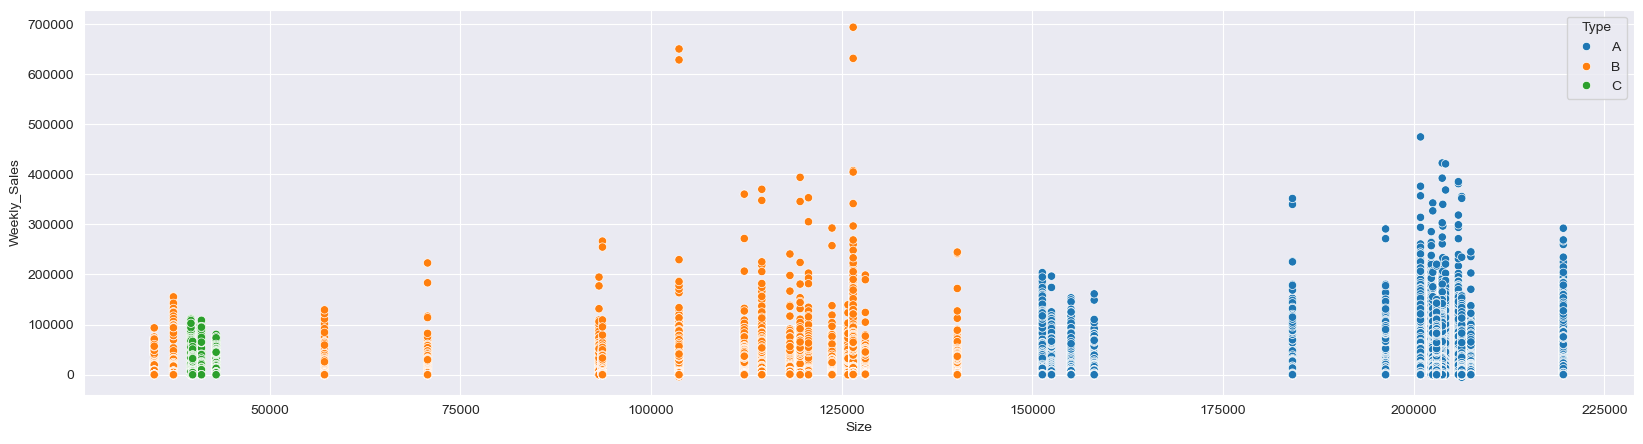

In [179]:
sns.scatterplot(data= dataset, y='Weekly_Sales', x='Size', hue=dataset['Type'])
plt.show()


### Insight: As the size of store increases sales also increases we can see three clusters means Size of store depend upon Type of store ###
### Which month has the highest sales?  ###

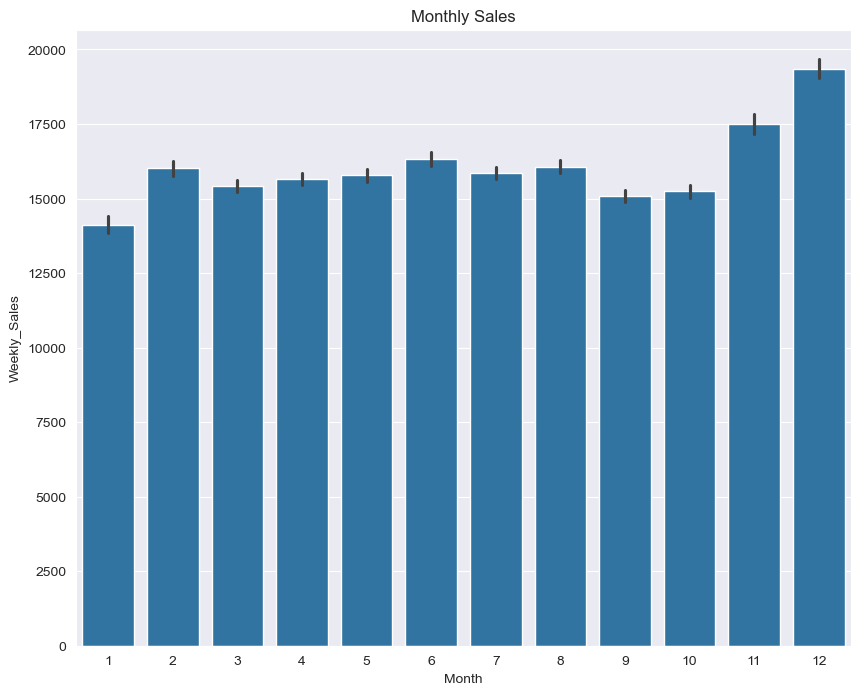

In [182]:
plt.figure(figsize =(10,8))
sns.barplot(data= dataset, y='Weekly_Sales', x='Month')
plt.title('Monthly Sales')
plt.show()

### Insight In the month of December, which is a holiday month for Christmas, the weekly sales show an increase. Throughout the year, the sales remain relatively stable, except for a decline around week 42, followed by a recovery during the holiday season. ###

### Does the department have any influence on weekly sales? ###

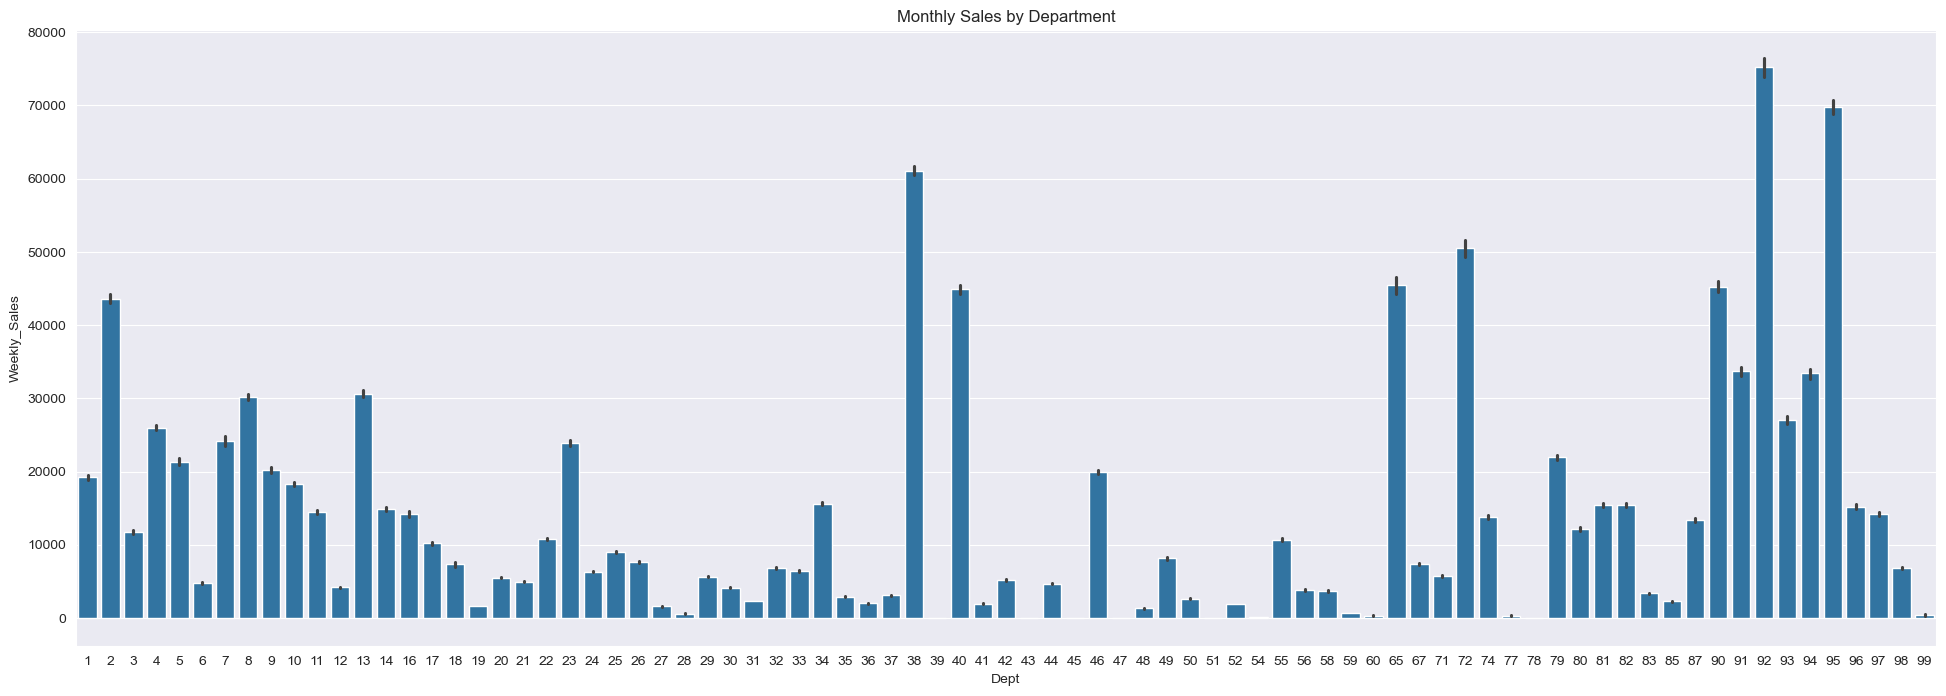

In [191]:
plt.figure(figsize =(24,8))
sns.barplot(data = dataset, x ='Dept', y ='Weekly_Sales')
plt.title('Monthly Sales by Department')
plt.show()

### Department 92,95,38,72,40,90,2,91 are restpectively higher weekly sales ###
### Insight: Some departments contribute to higher weekly sales. ###